<a href="https://colab.research.google.com/github/Vashu-Garg/OSDG-Multiclass-Classification/blob/main/SDG_Community_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OSDG Community Classification Problem:

**Dataset Information**

In support of the global effort to achieve the Sustainable Development Goals (SDGs) , OSDG is realising a series of SDG-labelled text datasets. Being the first one in the series, the OSDG Community Dataset (OSDG-CD) is the direct result of the work of more than a thousand volunteers from over 100 countries who have contributed to our understanding of SDGs via the OSDG Community Platform (OSDG-CP). The dataset contains tens of thousands of text excerpts (henceforth: texts) which were validated by the Community volunteers with respect to SDGs. The data can be used to derive insights into the nature of SDGs using either ontology-based or machine learning approaches.

The file contains 32,120 text excerpts and a total of 172,769 assigned labels.

**Source Data**

The dataset consists of text excerpts of paragraph length derived from publicly available documents, including reports, policy documents and publication abstracts. A significant number of documents (more than 3 thousand) originate from UN-related sources such as SDG-Pathfinder and SDG Library. These sources often contain documents that already have SDG labels associated with them. Each text is comprised of 3 to 6 sentences and is about 90 words on average.

**Methodology**

All texts are evaluated by volunteers on the OSDG-CP. The Platform is an ambitious attempt to bring together researchers, subject matter experts and SDG advocates from all around the world to create a large and accurate source of textual information on SDGs. The Community volunteers use the Platform to participate in labelling exercises where they validate each text's relevance to SDGs based on their background knowledge. In each exercise, the volunteer is shown a text together with an SDG label associated with it - this usually comes from the source - and asked to either accept or reject the suggested label.

There are three types of exercises: 

1. All volunteers start with the mandatory introductory exercise that consists of 10 pre-selected texts. Each volunteer must fully complete this exercise before they can access two other exercise types. Upon completion, the volunteer reviews the exercise by comparing their answers with the answers of the rest of the Community using aggregated statistics we provide, i.e., the share of those who accepted and rejected the suggested SDG label for each of the 10 texts. This helps the volunteer to get a feel of the platform. 
2. SDG-specific exercises where the volunteer validates texts with respect to a single SDG, e.g., SDG 1 No Poverty. 

3. All SDGs exercise where the volunteer validates a random sequence of texts where each text can have any SDG as its associated label. 

After finishing the introductory exercise, the volunteer is free to select either SDG-specific or All SDGs exercises. Each exercise, regardless of its type, consists of 100 texts. Once the exercise is finished, the volunteer can either label more or exit the platform. Of course, the volunteer can finish the exercise early. All progress is saved and recorded still. To ensure quality, each text is validated by up to 9 different volunteers and all texts included in the public release of the data have been validated by at least 3 different volunteers.

It is worth keeping in mind that all exercises present the volunteers with a binary decision problem, i.e., either accept or reject a suggested label. The volunteers are never asked to select one or more SDGs a certain text might relate to. The rationale behind this set-up is that asking a volunteer to select from 17 SDGs is extremely inefficient. Currently, all texts are validated against only one associated SDG label. 

**Variable Understanding:**

doi - Digital Object Identifier of the original document

text_id - unique text identifier

text - text excerpt from the document

sdg - the SDG the text is validated against

labels_negative - the number of volunteers who rejected the suggested SDG label

labels_positive - the number of volunteers who accepted the suggested SDG label

agreement - agreement score based on the formula
 
agreement=(labelspositive−labelsnegative) / (labelspositive+labelsnegative)

**TOP 15 SDG (Sustainable Development Goals):-**

GOAL 1: No Poverty

GOAL 2: Zero Hunger

GOAL 3: Good Health and Well-being

GOAL 4: Quality Education

GOAL 5: Gender Equality

GOAL 6: Clean Water and Sanitation

GOAL 7: Affordable and Clean Energy

GOAL 8: Decent Work and Economic Growth

GOAL 9: Industry, Innovation and Infrastructure

GOAL 10: Reduced Inequality

GOAL 11: Sustainable Cities and Communities

GOAL 12: Responsible Consumption and Production

GOAL 13: Climate Action

GOAL 14: Life Below Water

GOAL 15: Life on Land

# Importing Libraries and Dataset:-

In [ ]:
# import Library
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
SDG_df = pd.read_csv('https://zenodo.org/record/5550238/files/osdg-community-dataset-v21-09-30.csv?download=1', sep='\t')
print('Shape:', SDG_df.shape)

Shape: (32120, 7)


In [ ]:
SDG_df.head(10)

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000
5,10.1787/5js4xfgl4ks0-en,000b54717f2deea5d99055b4c1c2bf5a,These findings are consistent with previous wo...,10,2,5,0.428571
6,10.1787/9789264285712-7-en,000bc99895142f9b6795ddf402e16e9a,"Each section states the economic principle, re...",6,1,3,0.500000
7,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000
8,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000
9,10.1787/1826beee-en,0014f8ae09b458434c107236c86c2c38,"To encourage N runoff reductions by farmers, t...",6,1,2,0.333333


# Exploratory Data Analysis:-

In [ ]:
print("Null values in SDG text:",SDG_df['text'].isna().sum())
print("Null values in SDG label:",SDG_df['sdg'].isna().sum())

Null values in SDG text: 0
Null values in SDG label: 0


In [ ]:
SDG_df['sdg'].nunique()

15

In [ ]:
SDG_df['sdg'].value_counts()

5     4327
4     3740
6     2826
7     2808
1     2740
3     2698
2     2463
11    2286
13    2085
8     1517
9     1093
14    1087
10    1027
15     960
12     463
Name: sdg, dtype: int64

In [ ]:
def avg_len(sent):
  word_list = nltk.word_tokenize(sent)
  sent_len=len(word_list)
  return sent_len

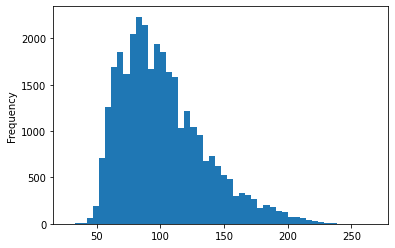

In [ ]:
from nltk.downloader import Label
SDG_df['Text Length'] = SDG_df['text'].apply(avg_len)
SDG_df['Text Length'].plot(bins=50,kind='hist')

In [ ]:
print("Min text length:",SDG_df['Text Length'].min())
print("Average text length:",SDG_df['Text Length'].mean())
print("Max text length:",SDG_df['Text Length'].max())

Min text length: 28
Average text length: 102.13633250311332
Max text length: 267


In [ ]:
SDG_df['labels_positive_tag'] = np.where((SDG_df['labels_positive'] >= SDG_df['labels_negative']), 1, 0)
SDG_df['labels_negative_tag'] = np.where((SDG_df['labels_negative'] >= SDG_df['labels_positive']), 1, 0)

In [ ]:
SDG_df.head(2)

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,Text Length,labels_positive_tag,labels_negative_tag
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000,194,1,0
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333,58,0,1


([<matplotlib.patches.Wedge at 0x7f976f67c5e0>,
 [Text(-0.908292572567393, 0.620487391184468, 'Positively Accepted SDGs'),
  Text(0.9082926016145034, -0.6204873486642231, 'Negatively Accepted SDGs')],
 [Text(-0.49543231230948703, 0.3384476679188007, '80.9%'),
  Text(0.49543232815336546, -0.33844764472593986, '19.1%')])

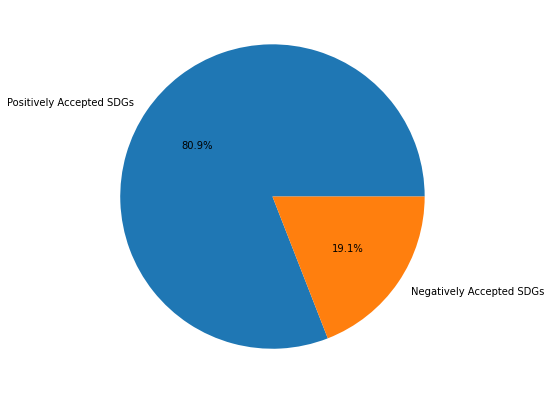

In [ ]:
#Value Distribution of num of MAX Accepted and MAX Rejected SDGs
fig = plt.figure(figsize =(10, 7))
plt.pie([sum(SDG_df['labels_positive_tag']),sum(SDG_df['labels_negative_tag'])],autopct='%1.1f%%',labels = ["Positively Accepted SDGs","Negatively Accepted SDGs"])

In [ ]:
# We will use only those data rows whose suggested sdg labels is accepted and the agreement score is at least .5
print('Shape before:', SDG_df.shape)
SDG_df = SDG_df.query('agreement >= .5 and labels_positive > labels_negative').copy()
print('Shape after :', SDG_df.shape)

Shape before: (32120, 10)
Shape after : (20007, 10)


# Text Cleaning:-

In [ ]:
SDG_df.shape

(20007, 10)

In [ ]:
SDG_df.drop(columns=['doi','text_id','labels_negative','labels_positive','agreement','Text Length','labels_positive_tag','labels_negative_tag'],axis=1,inplace=True)

In [ ]:
SDG_df.shape

(20007, 2)

In [ ]:
SDG_df.head()

,text,sdg
0,"From a gender perspective, Paulgaard points ou...",5
2,The average figure also masks large difference...,3
6,"Each section states the economic principle, re...",6
7,The Israel Oceanographic and Limnological Rese...,6
8,Previous chapters have discussed ways to make ...,2


In [ ]:
SDG_df.sdg.value_counts()

5     2679
4     2632
3     2044
7     1793
6     1587
11    1467
1     1413
13    1306
2     1033
8      976
14     807
9      798
15     653
10     529
12     290
Name: sdg, dtype: int64

In [ ]:
#Remove Punctuations from the text data
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
SDG_df['text'] = SDG_df['text'].apply(remove_punctuations)

In [ ]:
import re
def text_cleaner(data) :
    text = re.sub("(@[A-Za-z0-9]+)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])|(\d)", "", data)
    return text
SDG_df['text'] = SDG_df['text'].apply(text_cleaner)
SDG_df['text'] = SDG_df['text'].map(lambda x: x.lower())

In [ ]:
SDG_df['text'][157]

'a representative list of gris open to global cooperation and of interest to new partners will be created a report from the group on the coordination of gris is expected a progress report was presented in  among such infrastructures ocean and sea floor observatories including oceanography fleets of research vessels and polar research facilities both for the arctic and antarctic were specifically mentioned as examples in the broad categories of research infrastructures of global relevance following on from the publication of the report on road mapping of large infrastructures  and the report on establishing large international research infrastructures issues and options  the oecd global science forum gsf published a report on international distributed research infrastructures idris in  this report can serve as a reference document that may be used when new initiatives to share infrastructure are being prepared it identifies challenges options and solutions when it comes to setting up ne

In [ ]:
#Removing stopwords
SDG_df['text'] = SDG_df['text'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [ ]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
SDG_df['text'] = SDG_df['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
#Tokeniziation
corpus=SDG_df['text'].apply(word_tokenize)
corpus

0        [gender, perspective, paulgaard, point, labour...
2        [average, figure, also, mask, large, differenc...
6        [section, state, economic, principle, review, ...
7        [israel, oceanographic, limnological, research...
8        [previous, chapter, discussed, way, make, food...
                               ...                        
32109    [mauritius, housing, development, economically...
32110    [consequence, number, urban, dweller, practisi...
32115    [also, feature, individual, accountability, me...
32117    [groundwater, quality, also, affected, contami...
32119    [three, disease, resulted, greatest, number, l...
Name: text, Length: 20007, dtype: object

# MultiClass SDG Classifier:-

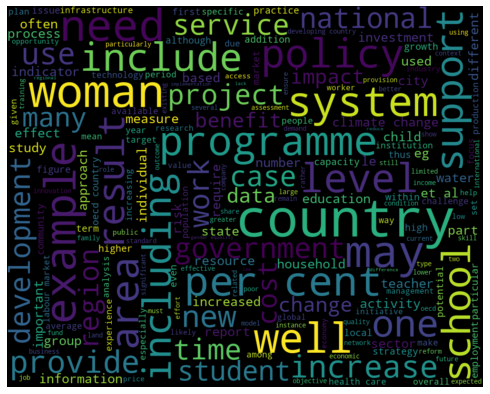

In [ ]:
#Wordnet for all words including the corpus of all SDGs
all_words = ' '.join([text for text in SDG_df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    SDG_df.text, 
    SDG_df.sdg,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=SDG_df.sdg
)

In [ ]:
Models_Accuracy = []
Models_Name = []

## Multinomial Naive Bayes:-

In [ ]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer(max_df = 0.85,min_df = 10)),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_NB = clf.predict(X_test)


In [ ]:
accuracy_MultinomialNB= accuracy_score(y_test, y_pred_NB)
Models_Accuracy.append(accuracy_MultinomialNB)
Models_Name.append("Naive Bayes")
print("accuracy: %f" % (accuracy_MultinomialNB))

accuracy: 0.781359


In [ ]:
# print the classfication report
print('Classification report for Naive Bayes Regression (Test set)= ')
print(classification_report(y_test, y_pred_NB))

Classification report for Naive Bayes Regression (Test set)= 
              precision    recall  f1-score   support

           1       0.70      0.80      0.75       283
           2       0.81      0.71      0.76       207
           3       0.91      0.92      0.92       409
           4       0.81      0.97      0.88       526
           5       0.71      0.96      0.82       536
           6       0.77      0.89      0.83       317
           7       0.71      0.94      0.81       359
           8       0.73      0.25      0.37       195
           9       0.83      0.33      0.47       160
          10       1.00      0.04      0.07       106
          11       0.81      0.80      0.81       293
          12       1.00      0.03      0.07        58
          13       0.79      0.82      0.80       261
          14       0.96      0.73      0.83       161
          15       0.91      0.44      0.59       131

    accuracy                           0.78      4002
   macro avg      

In [ ]:
#Generate the confusion matrix
cf_matrix_NB = confusion_matrix(y_test,y_pred_NB)

print(cf_matrix_NB)

[[227   5   4   5  32   2   2   2   0   0   1   0   3   0   0]
 [ 12 148   3   5  15   2  14   1   0   0   0   0   5   2   0]
 [  7   1 378   6   9   2   2   0   1   0   2   0   1   0   0]
 [  0   0   4 508  12   0   1   1   0   0   0   0   0   0   0]
 [  7   2   6   6 515   0   0   0   0   0   0   0   0   0   0]
 [  1   4   2   1   7 283   7   0   0   0   5   0   2   2   3]
 [  0   0   1   5   1   3 337   0   1   0   5   0   6   0   0]
 [ 13   3   2  39  59   1  19  49   3   0   7   0   0   0   0]
 [  1   4   4  26  21   3  26   1  53   0  14   0   7   0   0]
 [ 42   3   3   8  25   1   4  10   2   4   2   0   2   0   0]
 [  8   0   4   8  11  11  10   2   1   0 234   0   4   0   0]
 [  2   1   1   2   3  16  19   0   1   0   9   2   2   0   0]
 [  2   3   0   5   5   8  21   0   0   0   2   0 213   1   1]
 [  1   5   3   3   2  14   3   0   2   0   1   0   7 118   2]
 [  3   3   2   4   5  23   9   1   0   0   6   0  17   0  58]]


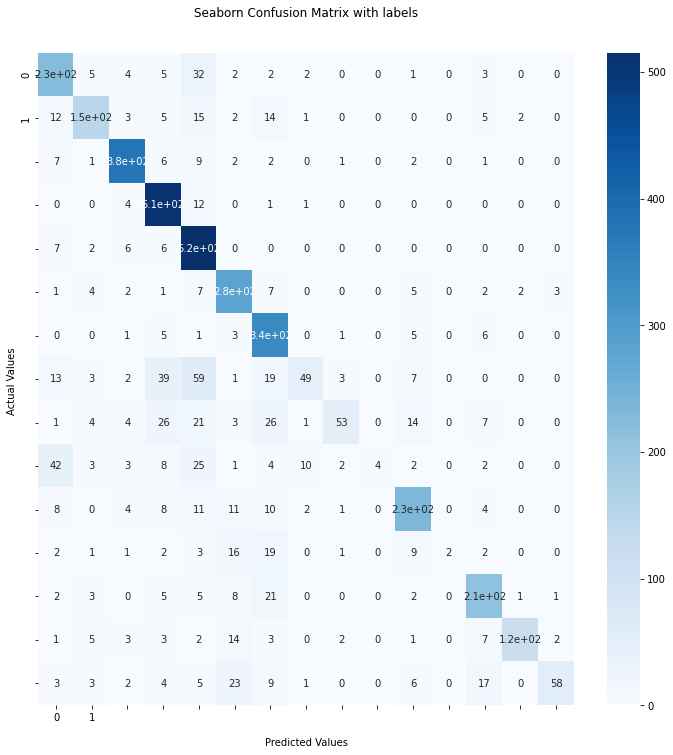

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(cf_matrix_NB, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine:-

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vectorizer_tfidf',TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred_sdg = sgd.predict(X_test)

In [ ]:
accuracy_sdg= accuracy_score(y_test, y_pred_sdg)
Models_Accuracy.append(accuracy_sdg)
Models_Name.append("SVM")
print("accuracy: %f" % (accuracy_sdg))

accuracy: 0.838331


In [ ]:
# print the classfication report
print('Classification report for Naive Bayes Regression (Test set)= ')
print(classification_report(y_test, y_pred_sdg))

Classification report for Naive Bayes Regression (Test set)= 
              precision    recall  f1-score   support

           1       0.77      0.82      0.79       283
           2       0.78      0.80      0.79       207
           3       0.87      0.95      0.91       409
           4       0.84      0.98      0.90       526
           5       0.84      0.96      0.89       536
           6       0.85      0.93      0.89       317
           7       0.85      0.95      0.89       359
           8       0.73      0.34      0.46       195
           9       0.84      0.54      0.66       160
          10       0.93      0.25      0.39       106
          11       0.83      0.83      0.83       293
          12       0.88      0.40      0.55        58
          13       0.85      0.85      0.85       261
          14       0.92      0.89      0.91       161
          15       0.85      0.76      0.81       131

    accuracy                           0.84      4002
   macro avg      

In [ ]:
#Generate the confusion matrix
cf_matrix_sdg = confusion_matrix(y_test,y_pred_sdg)

print(cf_matrix_sdg)

[[231  10  13   4  12   2   0   6   0   2   3   0   0   0   0]
 [  6 165   4   3   7   3   6   1   0   0   2   0   4   3   3]
 [  3   1 388   2   8   1   1   0   2   0   3   0   0   0   0]
 [  2   0   3 513   6   0   0   1   0   0   0   0   1   0   0]
 [  2   1   7  11 512   1   0   1   0   0   1   0   0   0   0]
 [  0   2   2   1   1 295   2   0   0   0   3   1   3   4   3]
 [  0   1   0   2   1   4 340   0   1   0   6   0   4   0   0]
 [ 10   3  12  41  31   1   9  66   7   0  11   0   4   0   0]
 [  5   8   6  11   5   4  10   2  87   0  16   0   4   1   1]
 [ 32   4   6  10  11   2   0  10   2  26   2   0   1   0   0]
 [  4   1   3   5   9   9   7   1   2   0 244   2   5   0   1]
 [  2   3   1   2   2   6   8   2   1   0   2  23   6   0   0]
 [  2   5   0   2   4   7  11   0   1   0   1   0 221   2   5]
 [  0   2   1   1   0   6   2   0   0   0   0   0   1 144   4]
 [  1   5   2   1   1   5   5   1   0   0   1   0   6   3 100]]


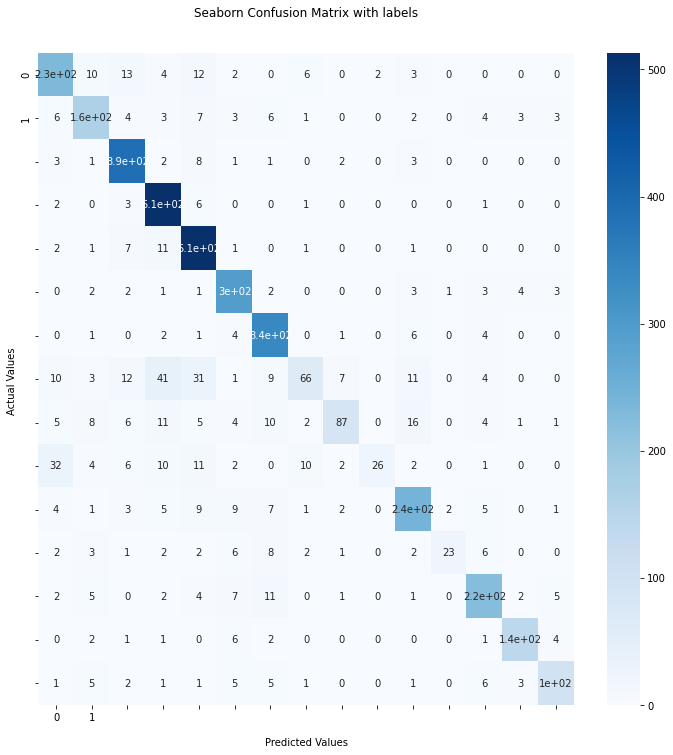

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(cf_matrix_sdg, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Logistic Regression:-

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vectorizer_tfidf',TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, multi_class='multinomial')),
               ])
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [ ]:
accuracy_log= accuracy_score(y_test, y_pred_log)
Models_Accuracy.append(accuracy_log)
Models_Name.append("Logistic")
print("accuracy: %f" % (accuracy_log))

accuracy: 0.865817


In [ ]:
# print the classfication report
print('Classification report for Naive Bayes Regression (Test set)= ')
print(classification_report(y_test, y_pred_log))

Classification report for Naive Bayes Regression (Test set)= 
              precision    recall  f1-score   support

           1       0.78      0.82      0.80       283
           2       0.82      0.87      0.84       207
           3       0.92      0.94      0.93       409
           4       0.93      0.94      0.93       526
           5       0.91      0.92      0.92       536
           6       0.89      0.89      0.89       317
           7       0.92      0.92      0.92       359
           8       0.64      0.69      0.66       195
           9       0.75      0.75      0.75       160
          10       0.71      0.50      0.59       106
          11       0.85      0.86      0.86       293
          12       0.80      0.57      0.67        58
          13       0.89      0.86      0.87       261
          14       0.95      0.92      0.94       161
          15       0.86      0.81      0.83       131

    accuracy                           0.87      4002
   macro avg      

In [ ]:
#Generate the confusion matrix
cf_matrix_log = confusion_matrix(y_test,y_pred_log)

print(cf_matrix_log)

[[232   7   4   3   6   1   0  13   1  10   5   0   1   0   0]
 [  7 181   3   1   2   3   1   3   1   1   0   0   3   1   0]
 [  3   2 383   1   3   1   1   7   3   1   2   0   1   1   0]
 [  4   0   1 494  11   0   0   9   5   2   0   0   0   0   0]
 [ 10   4  10   6 493   1   0   7   1   1   2   0   0   0   1]
 [  3   8   2   0   1 282   3   0   1   0   1   1   4   4   7]
 [  2   3   2   2   0   2 329   0   5   1   5   1   7   0   0]
 [  9   1   3  14  12   1   1 134   8   5   6   1   0   0   0]
 [  1   3   2   3   3   2   3   9 120   1   9   1   3   0   0]
 [ 18   1   1   3   6   2   0  16   3  53   2   0   1   0   0]
 [  4   1   3   3   1   5   5   9   5   0 252   1   3   0   1]
 [  2   3   0   1   2   4   5   0   2   0   4  33   2   0   0]
 [  3   3   0   2   1   5   9   2   2   0   4   1 225   0   4]
 [  0   2   1   0   0   1   0   0   3   0   1   0   1 148   4]
 [  1   3   1   0   0   8   2   2   0   0   2   2   3   1 106]]


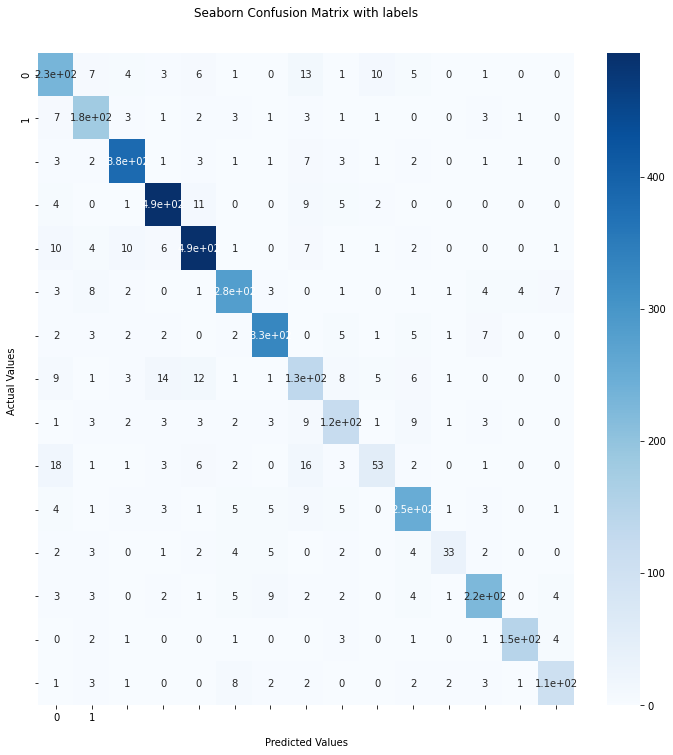

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(cf_matrix_log, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Light GBM Model:-

In [ ]:
from lightgbm import LGBMClassifier
lgbm = Pipeline([('vectorizer_tfidf',TfidfVectorizer()),
                ('clf', LGBMClassifier(objective='multiclass',learning_rate=0.05)),
               ])
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
y_pred_lgbm[0:25]

array([ 5, 11, 13, 13,  5, 11,  8,  6,  4,  3,  3,  8,  4,  7,  4,  4,  1,
        5, 10,  5,  2,  2,  3,  4,  4])

In [ ]:
y_test[0:25]

23035     5
14383    11
9898      2
1937     13
14355     5
17256    11
24758     9
30472     6
5550      4
3855      3
19517     3
7726      3
22031     4
32050     7
19238     4
16686     4
4902      1
11855     5
6633     10
13186     5
26155     8
18835     9
4401      4
22230     4
6681      4
Name: sdg, dtype: int64

In [ ]:
accuracy_lgbm= accuracy_score(y_test, y_pred_lgbm)
Models_Accuracy.append(accuracy_lgbm)
Models_Name.append("Light GBM")
print("accuracy: %f" % (accuracy_lgbm))

accuracy: 0.838581


In [ ]:
# print the classfication report
print('Classification report for Light GBM Classifier (Test set)= ')
print(classification_report(y_test, y_pred_lgbm))

Classification report for Light GBM Classifier (Test set)= 
              precision    recall  f1-score   support

           1       0.77      0.81      0.79       283
           2       0.76      0.78      0.77       207
           3       0.89      0.92      0.90       409
           4       0.90      0.94      0.92       526
           5       0.88      0.93      0.91       536
           6       0.88      0.91      0.89       317
           7       0.88      0.91      0.89       359
           8       0.63      0.56      0.59       195
           9       0.67      0.62      0.64       160
          10       0.82      0.43      0.57       106
          11       0.78      0.82      0.80       293
          12       0.78      0.43      0.56        58
          13       0.85      0.83      0.84       261
          14       0.92      0.91      0.92       161
          15       0.80      0.77      0.79       131

    accuracy                           0.84      4002
   macro avg       0

In [ ]:
#Generate the confusion matrix
cf_matrix_lgbm = confusion_matrix(y_test,y_pred_lgbm)

print(cf_matrix_lgbm)

[[229  10   8   4   9   0   1  11   0   5   5   0   1   0   0]
 [  8 161   3   0   6   4   2   3   4   0   5   0   4   3   4]
 [  3   3 378   1   4   0   0   5   4   0   9   0   1   1   0]
 [  6   0   5 493  11   0   0   4   3   1   1   0   2   0   0]
 [  8   1  10   9 498   1   0   3   1   2   3   0   0   0   0]
 [  0   5   3   0   1 288   3   0   0   0   4   2   3   3   5]
 [  1   2   0   3   0   5 325   1   6   0   7   0   8   0   1]
 [  8   5   5  17  19   0   4 109  15   2   9   1   0   0   1]
 [  4   6   2   6   1   2  10  10  99   0  15   0   3   1   1]
 [ 21   3   4   5   7   0   0  11   5  46   2   0   1   0   1]
 [  3   1   3   7   4   9   5   5   6   0 241   2   4   0   3]
 [  1   5   2   1   0   4   4   6   2   0   2  25   6   0   0]
 [  2   6   0   1   3   6  12   1   1   0   2   2 217   2   6]
 [  0   0   2   0   1   5   1   0   1   0   2   0   0 146   3]
 [  3   5   2   0   0   4   3   3   1   0   3   0   4   2 101]]


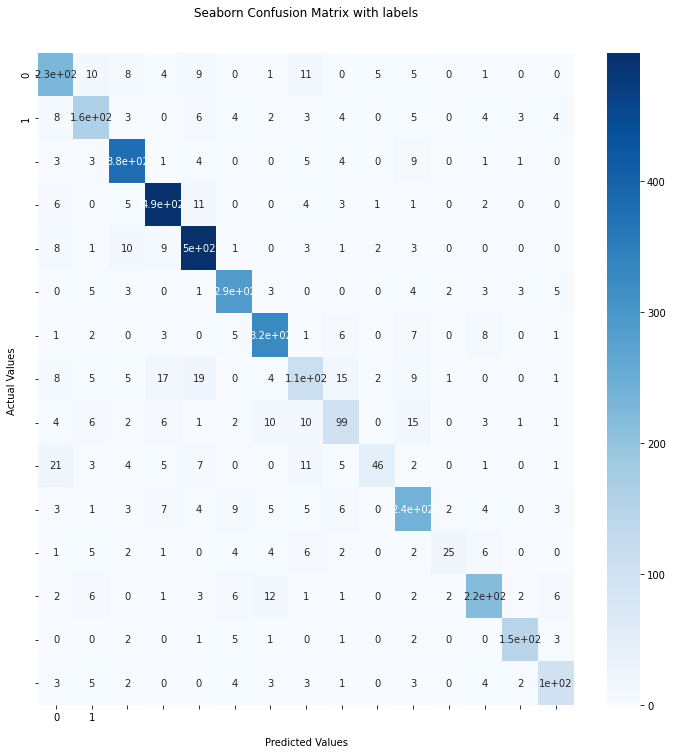

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(cf_matrix_lgbm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## XG Boost Model:-

In [ ]:
from xgboost import XGBClassifier
xgb = Pipeline([('vectorizer_tfidf',TfidfVectorizer()),
                ('clf',XGBClassifier(max_depth = 5, learning_rate = 0.1)),
               ])
xgb.fit(X_train, y_train)
y_pred_xgb = lgbm.predict(X_test)

In [ ]:
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
Models_Accuracy.append(accuracy_xgb)
Models_Name.append("XG Boost")
print("accuracy: %f" % (accuracy_xgb))

accuracy: 0.838581


In [ ]:
# print the classfication report
print('Classification report for XG Boost Classifier (Test set)= ')
print(classification_report(y_test, y_pred_xgb))

Classification report for XG Boost Classifier (Test set)= 
              precision    recall  f1-score   support

           1       0.77      0.81      0.79       283
           2       0.76      0.78      0.77       207
           3       0.89      0.92      0.90       409
           4       0.90      0.94      0.92       526
           5       0.88      0.93      0.91       536
           6       0.88      0.91      0.89       317
           7       0.88      0.91      0.89       359
           8       0.63      0.56      0.59       195
           9       0.67      0.62      0.64       160
          10       0.82      0.43      0.57       106
          11       0.78      0.82      0.80       293
          12       0.78      0.43      0.56        58
          13       0.85      0.83      0.84       261
          14       0.92      0.91      0.92       161
          15       0.80      0.77      0.79       131

    accuracy                           0.84      4002
   macro avg       0.

In [ ]:
#Generate the confusion matrix
cf_matrix_xgb = confusion_matrix(y_test,y_pred_xgb)

print(cf_matrix_xgb)

[[229  10   8   4   9   0   1  11   0   5   5   0   1   0   0]
 [  8 161   3   0   6   4   2   3   4   0   5   0   4   3   4]
 [  3   3 378   1   4   0   0   5   4   0   9   0   1   1   0]
 [  6   0   5 493  11   0   0   4   3   1   1   0   2   0   0]
 [  8   1  10   9 498   1   0   3   1   2   3   0   0   0   0]
 [  0   5   3   0   1 288   3   0   0   0   4   2   3   3   5]
 [  1   2   0   3   0   5 325   1   6   0   7   0   8   0   1]
 [  8   5   5  17  19   0   4 109  15   2   9   1   0   0   1]
 [  4   6   2   6   1   2  10  10  99   0  15   0   3   1   1]
 [ 21   3   4   5   7   0   0  11   5  46   2   0   1   0   1]
 [  3   1   3   7   4   9   5   5   6   0 241   2   4   0   3]
 [  1   5   2   1   0   4   4   6   2   0   2  25   6   0   0]
 [  2   6   0   1   3   6  12   1   1   0   2   2 217   2   6]
 [  0   0   2   0   1   5   1   0   1   0   2   0   0 146   3]
 [  3   5   2   0   0   4   3   3   1   0   3   0   4   2 101]]


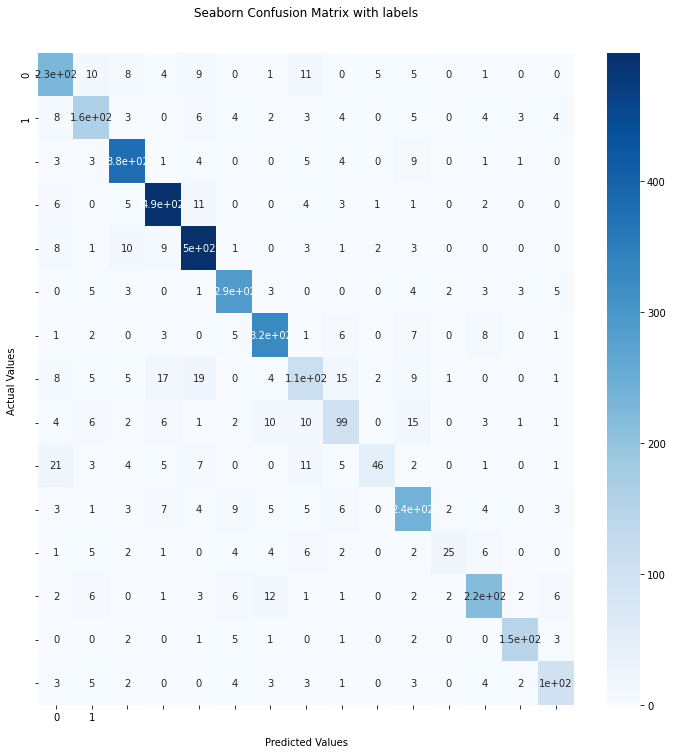

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(cf_matrix_xgb, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## All Models Outcome:-

In [ ]:
Models_Accuracy = pd.DataFrame(list(zip(Models_Name, Models_Accuracy)),columns =['Models', 'Accuracy']).sort_values('Accuracy')

In [ ]:
Models_Accuracy

,Models,Accuracy
0,Naive Bayes,0.781359
1,SVM,0.838331
3,Light GBM,0.838581
4,XG Boost,0.838581
2,Logistic,0.865817


<BarContainer object of 5 artists>

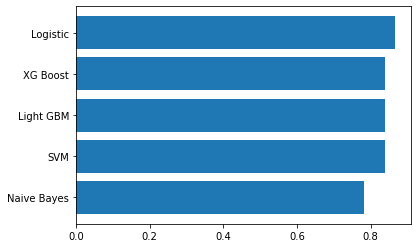

In [ ]:
plt.barh(Models_Accuracy['Models'],Models_Accuracy['Accuracy'])

# Binary SDG Classifier:-

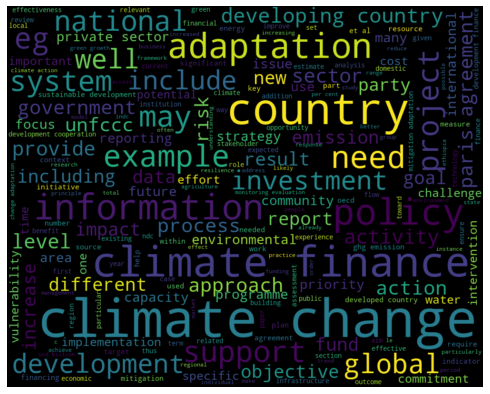

In [ ]:
#Wordnet for all words of SDG Group =13 (Climate Action)
all_words = ' '.join([text for text in SDG_df['text'][SDG_df['sdg']== 13]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
sdg_group = 13 # selecting an sdg group of interest : Climate Action
# undersampling the rest of sdgs to balance out the instances
flag = SDG_df['sdg'].eq(sdg_group).values
SDG_df = SDG_df.groupby(flag).sample(flag.sum(), random_state = 42)
print('Shape of Updated Dataset:', SDG_df.shape)
display(SDG_df.head())

Shape of Updated Dataset: (2612, 2)


,text,sdg
90,aging infrastructure lack government managemen...,6
7687,additional benefit cooperation include increas...,15
4525,young people year age likely among working poo...,1
23066,glacier play also major role several part worl...,6
25748,progress area complex take longer achieve sinc...,5


In [ ]:
SDG_df['sdg'].value_counts()

13    1306
4      189
3      162
5      161
7      129
1      121
6      117
11      88
8       70
2       68
9       61
14      55
15      39
10      32
12      14
Name: sdg, dtype: int64

In [ ]:
SDG_df['Target']=SDG_df['sdg'].eq(sdg_group)
SDG_df['Target'].value_counts()

False    1306
True     1306
Name: Target, dtype: int64

In [ ]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    SDG_df['text'].values,
    SDG_df['Target'].values,
    test_size = .3,
    random_state = 42
)

In [ ]:
print('Shape train:', X_train_binary.shape)
print('Shape test:', X_test_binary.shape)

Shape train: (1828,)
Shape test: (784,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
pipe = Pipeline([
    ('vectoriser', CountVectorizer(
        ngram_range = (1, 2),
        max_features = 100_000,
        binary = True
    )),
    ('logr', LogisticRegression(penalty = 'l2', C = .3, random_state = 42))
])

pipe.fit(X_train_binary, y_train_binary)

Pipeline(steps=[('vectoriser',
                 CountVectorizer(binary=True, max_features=100000,
                                 ngram_range=(1, 2))),
                ('logr', LogisticRegression(C=0.3, random_state=42))])

In [ ]:
y_pred_binary = pipe.predict(X_test_binary)

In [ ]:
print(classification_report(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93       390
        True       0.96      0.88      0.92       394

    accuracy                           0.92       784
   macro avg       0.93      0.92      0.92       784
weighted avg       0.93      0.92      0.92       784



In [ ]:
#Generate the confusion matrix
cf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)

print(cf_matrix_binary)

[[377  13]
 [ 46 348]]


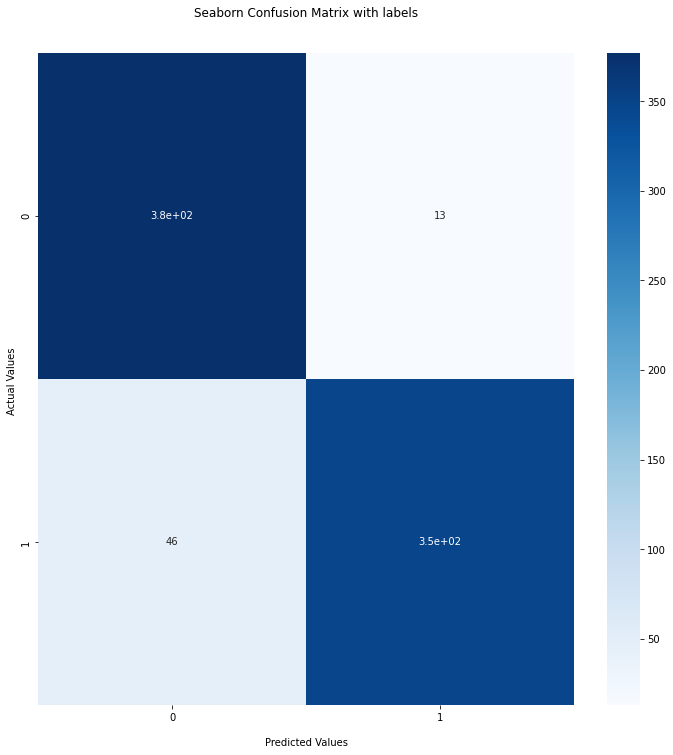

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(cf_matrix_binary, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

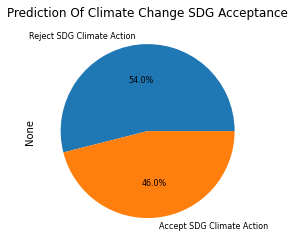

In [ ]:
from optparse import TitledHelpFormatter
pred_result =pd.Series(y_pred_binary)
pred_result.value_counts().plot(kind='pie', autopct='%1.1f%%',labels=("Reject SDG Climate Action","Accept SDG Climate Action"),title="Prediction Of Climate Change SDG Acceptance",fontsize = 8)

# Conclusion:-

In this OSDG dataset i did Multiclass Classification for 15 different Sustainable Development Goals. I used two approaches to do that as: In first approach i did Binary Classification (Model used Logistic  and got 92% accuracy, Whereas in second approach i did multiclass classification for all 15 SDG goals and got 86.58% accuracy.